# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | ghanzi
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | simpang
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | marshall
Processing Record 10 of Set 1 | nikolayevsk-on-amure
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | haiku-pauwela
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | dunedin
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | guane
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | gr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-1.22,72,31,1.72,RU,1717781155
1,ghanzi,-21.5667,21.7833,12.10,30,0,3.81,BW,1717781155
2,stanley,54.8680,-1.6985,14.87,70,20,7.20,GB,1717781070
3,kodiak,57.7900,-152.4072,6.73,81,75,6.17,US,1717781155
4,ushuaia,-54.8000,-68.3000,1.79,75,0,2.06,AR,1717781023


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-1.22,72,31,1.72,RU,1717781155
1,ghanzi,-21.5667,21.7833,12.10,30,0,3.81,BW,1717781155
2,stanley,54.8680,-1.6985,14.87,70,20,7.20,GB,1717781070
3,kodiak,57.7900,-152.4072,6.73,81,75,6.17,US,1717781155
4,ushuaia,-54.8000,-68.3000,1.79,75,0,2.06,AR,1717781023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

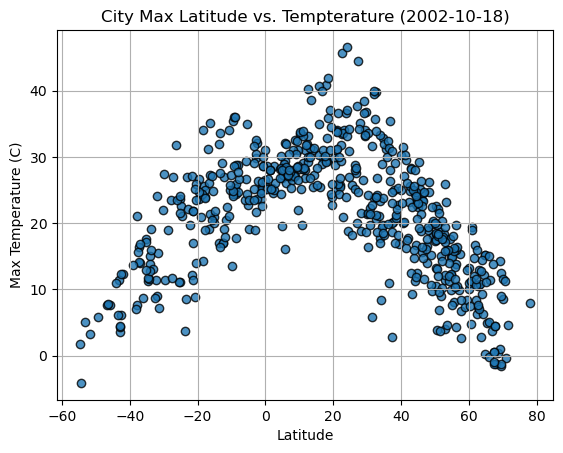

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors="black", linewidths= 1, marker="o", alpha= 0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Tempterature (2002-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

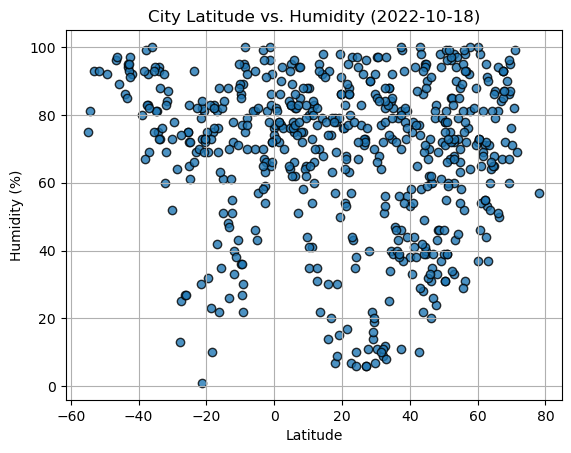

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity_scatter = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(city_data_df['Lat'], humidity_scatter, edgecolors="black", linewidths= 1, marker="o", alpha=0.8)
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

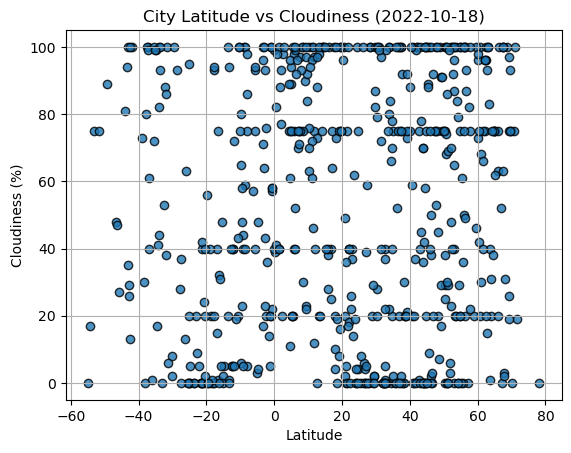

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness_scatter = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(city_data_df['Lat'], cloudiness_scatter, edgecolors="black", linewidths= 1, marker="o", alpha=0.8)
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

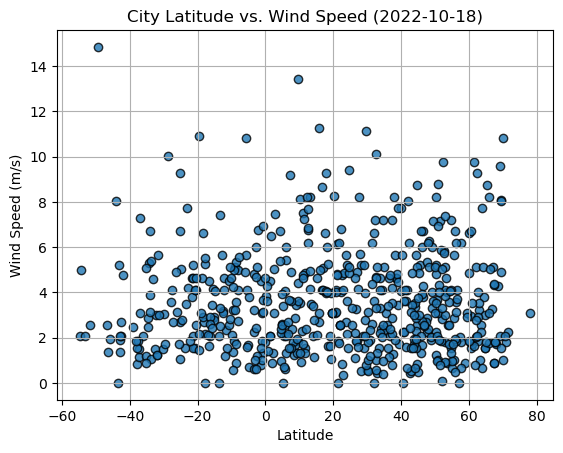

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors="black", linewidths= 1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_Regression(x_values, y_values, regEQplotX, regEQplotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    line_eq_reg = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    print(f'The r-value is {rvalue}')

    plt.annotate(line_eq_reg, (regEQplotX, regEQplotY), fontsize=15, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-1.22,72,31,1.72,RU,1717781155
2,stanley,54.8680,-1.6985,14.87,70,20,7.20,GB,1717781070
3,kodiak,57.7900,-152.4072,6.73,81,75,6.17,US,1717781155
7,qaqortoq,60.7167,-46.0333,4.71,98,100,2.94,GL,1717781016
8,marshall,34.3834,-86.3333,28.99,40,0,4.12,US,1717781156


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ghanzi,-21.5667,21.7833,12.10,30,0,3.81,BW,1717781155
4,ushuaia,-54.8000,-68.3000,1.79,75,0,2.06,AR,1717781023
5,adamstown,-25.0660,-130.1015,23.60,65,95,6.70,PN,1717781156
6,simpang,-1.2667,104.0833,23.59,96,5,0.80,ID,1717781156
10,grytviken,-54.2811,-36.5092,-4.14,81,17,4.97,GS,1717781027


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.7510672833851036


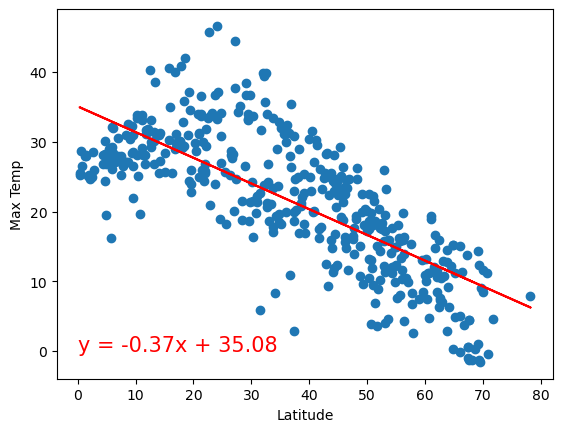

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

linear_Regression(x_values, y_values, 0, 0, 'Max Temp')

The r-value is 0.7607559457429665


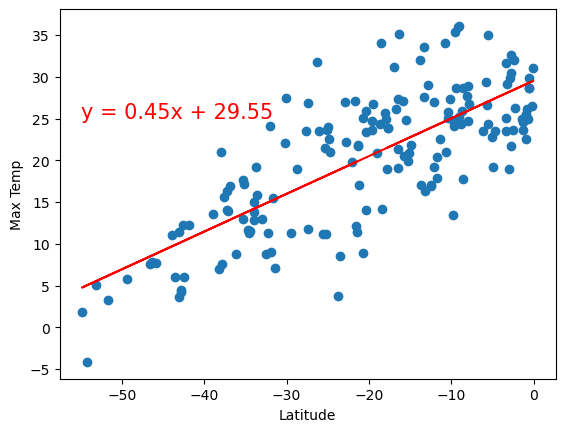

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

linear_Regression(x_values, y_values, -55, 25, 'Max Temp')

**Discussion about the linear relationship:** The Temperature vs. Latitude plots show a direct relationship between temperature and proximity to the equator. As expected, temperature tends to increase as we approach the equator at 0 degrees Latitude. However, the r-values and the points on the plot show that the relationship is not perfect. The hottest temperatures are not recorded exactly at the equator. They tend to peak at a point in between 20 and 30 for the Nortern hemisphere and somewhere closer to -10 for the Southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.020810191618514367


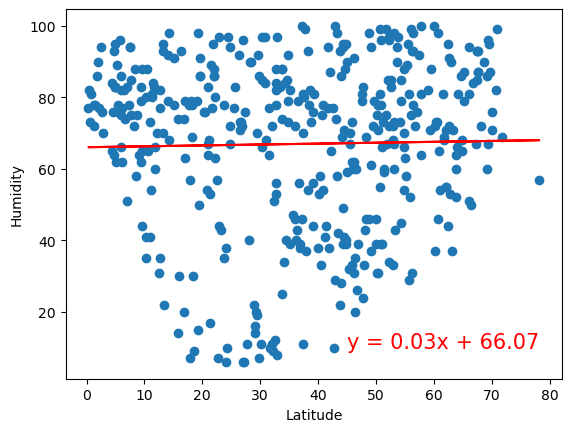

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

linear_Regression(x_values, y_values, 45, 10, 'Humidity')

The r-value is -0.24756540581232708


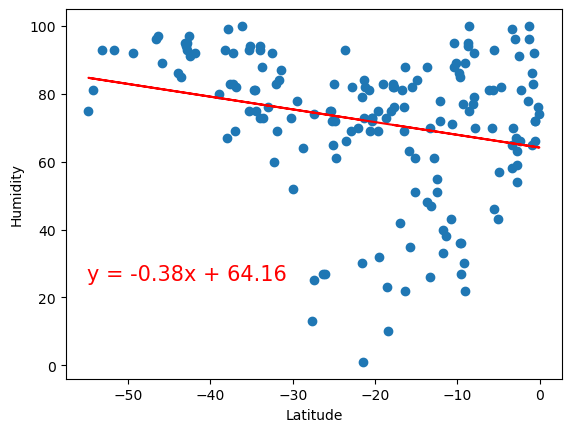

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

linear_Regression(x_values, y_values, -55, 25, 'Humidity')

**Discussion about the linear relationship:** There does not seem to be a strong correlation when analyzing humidity vs latitude in this dataset. In addition to the linear regression line indicating a weak correlation, the data points are also spread out with no discernable correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.04121922919494905


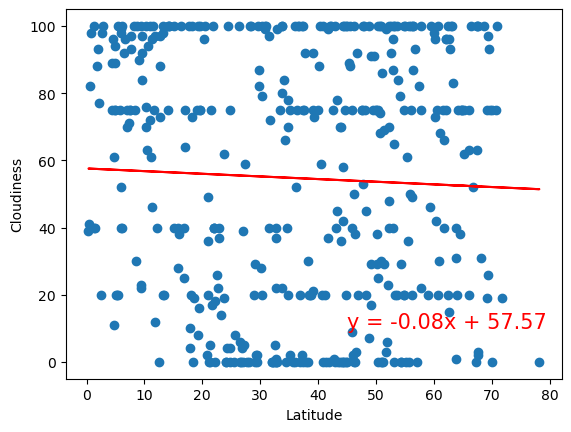

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

linear_Regression(x_values, y_values, 45, 10, 'Cloudiness')

The r-value is -0.052091675278919745


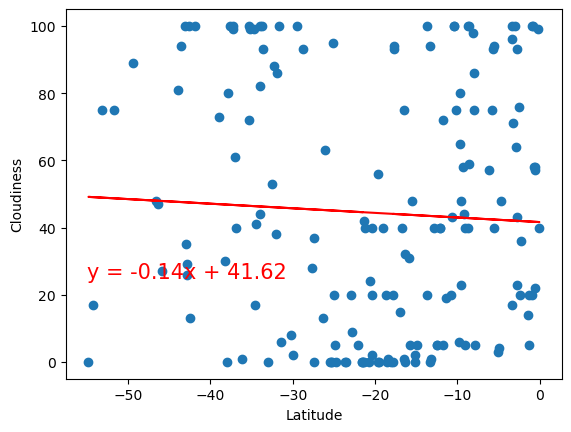

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

linear_Regression(x_values, y_values, -55, 25, 'Cloudiness')

**Discussion about the linear relationship:** Similar to the comparison with humidity, in analyzing the relationship between cloudiness vs. latitude we do not see a strong linear relationship. One of the interesting characteristics to not is the dense group of cities found at zero and 100 in both the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.021890073996622468


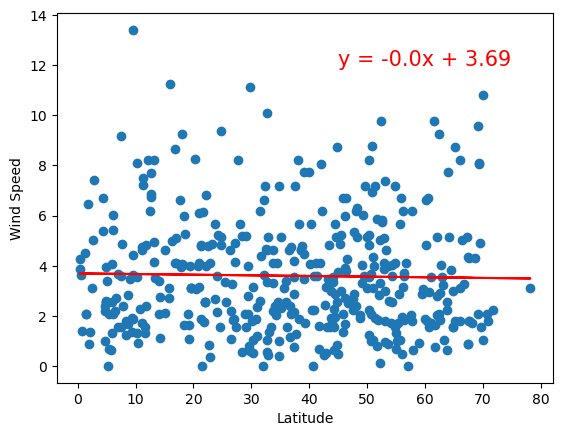

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

linear_Regression(x_values, y_values, 45, 12, 'Wind Speed')

The r-value is -0.008388248609754198


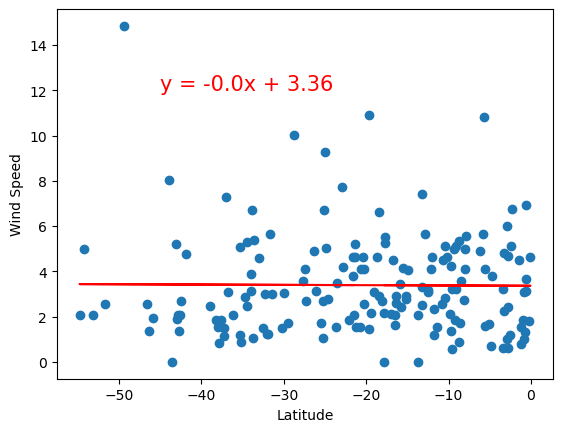

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

linear_Regression(x_values, y_values, -45, 12, 'Wind Speed')

**Discussion about the linear relationship:** Wind speed vs. latitude shows the weakest correlation between the four comparisons. The r-values of -0.02189 for the northern hemisphere and -0.00838 for the southern hemisphere indicate there is a weak negative correlation between these variables.